In [34]:
# Goal: Slice into the following format: [("BOX", "-76_-75_38_40")]
# gcd(1249-669, 494-244)=1
CONUS = (-124,-68,24,50)
x0,x1,y0,y1 = CONUS

In [45]:
# Produce a formatted input string for the SOMOSPIE workflow from a quadruple of values.
def quad_to_string(x0,x1,y0,y1):
    return f'("BOX", "{x0}_{x1}_{y0}_{y1}")'
quad_to_string(*CONUS)

'("BOX", "-125_-68_25_49")'

In [36]:
# Produce a list of input strings from a list of quadruples.
def quads_to_string(*quads):
    return f'[{",".join(quad_to_string(*quad) for quad in quads)}]'
quads_to_string((-100,-90,20,30),(-100,-90,30,40))

'[("BOX", "-100_-90_20_30"),("BOX", "-100_-90_30_40")]'

In [56]:
from math import ceil

# Given a large lat/lon box, this function cuts it into smaller, uniform subboxes.
def split_box_into_grid(x0=-126, x1=-68, y0=25, y1=49, nx=0, ny=0, dx=0, dy=0, ox=0, oy=0, digits=2):
    # x0,x1 are the lower,upper longitude bounds
    if x0>x1:
        x0,x1 = x1,x0
    if (x0<-180) or (x0==x1) or (x1>180):
        print("Invalid x0,x1!")
        return False
    
    # y0,y1 are the lower,upper latitude bounds
    if y0>y1:
        y0,y1 = y1,y0
    if (y0<-90) or (y0==y1) or (y1>90):
        print("Invalid y0,y1!")
        return False
    
    # nx is number of x-slices, dx is width of x-slices, ox is overlap of x-slices
    # if dx>0, then nx=ox=0
    # if nx>0, then dx=0
    if (nx*dx) or (dx*ox):
        print("Cannot have both dx and (nx or ox) nonzero.")
        return False
    if (ny*dy) or (dy*oy):
        print("Cannot have both dy and (ny or oy) nonzero.")
        return False

    # ox is calculated in terms of nx or dx if at least one of the two is nonzero
    if dx:
        nx = ceil((x1-x0)/dx)
        ox = (dx*nx-x1+x0)/(nx-1)
    elif nx:
        dx = (ox*(nx-1)+x1-x0)/nx
    else:
        print("Either dx or nx must be nonzero.")
        return False
    print(f"dx={dx}, nx={nx}, ox={ox}")
    
    # oy is calculated in terms of ny or dy if at least one of the two is nonzero
    if dy:
        ny = ceil((y1-y0)/dy)
        oy = (dy*ny-y1+y0)/(ny-1)
    elif ny:
        dy = (oy*(ny-1)+y1-y0)/ny
    else:
        print("Either dy or ny must be nonzero.")
        return False
    print(f"dy={dy}, ny={ny}, oy={oy}")
    
    # The start and end values of the boxes might be integers but be given as floats if ox=oy=0.0, 
    # so we handle that here.
    if (ox+oy):
        quads = [(x0 + i*(dx-ox), x0 + i*(dx-ox) + dx, y0 + j*(dy-oy), y0 + j*(dy-oy) + dy) for i in range(nx) for j in range(ny)]
    else:
        quads = [(x0 + i*dx, x0 + (i+1)*dx, y0 + j*dy, y0 + (j+1)*dy) for i in range(nx) for j in range(ny)]
    quads = [[round(a, digits) for a in quad] for quad in quads]
    #print(quads)
    return quads_to_string(*quads)
    

In [57]:
split_box_into_grid(dx = 2, dy = 2, digits=0)

dx=2, nx=29, ox=0.0
dy=2, ny=12, oy=0.0


'[("BOX", "-126_-124_25_27"),("BOX", "-126_-124_27_29"),("BOX", "-126_-124_29_31"),("BOX", "-126_-124_31_33"),("BOX", "-126_-124_33_35"),("BOX", "-126_-124_35_37"),("BOX", "-126_-124_37_39"),("BOX", "-126_-124_39_41"),("BOX", "-126_-124_41_43"),("BOX", "-126_-124_43_45"),("BOX", "-126_-124_45_47"),("BOX", "-126_-124_47_49"),("BOX", "-124_-122_25_27"),("BOX", "-124_-122_27_29"),("BOX", "-124_-122_29_31"),("BOX", "-124_-122_31_33"),("BOX", "-124_-122_33_35"),("BOX", "-124_-122_35_37"),("BOX", "-124_-122_37_39"),("BOX", "-124_-122_39_41"),("BOX", "-124_-122_41_43"),("BOX", "-124_-122_43_45"),("BOX", "-124_-122_45_47"),("BOX", "-124_-122_47_49"),("BOX", "-122_-120_25_27"),("BOX", "-122_-120_27_29"),("BOX", "-122_-120_29_31"),("BOX", "-122_-120_31_33"),("BOX", "-122_-120_33_35"),("BOX", "-122_-120_35_37"),("BOX", "-122_-120_37_39"),("BOX", "-122_-120_39_41"),("BOX", "-122_-120_41_43"),("BOX", "-122_-120_43_45"),("BOX", "-122_-120_45_47"),("BOX", "-122_-120_47_49"),("BOX", "-120_-118_25_27")

----

This section of the sandbox is for reading in and plotting the $r^2$ values for given methods used across every square in the list generated above.

In [2]:
import csv
#import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt

def heatmap(df, horizontal=0, vertical=1, value=2, vmin=None, vmax=None, size=1, title="Heatmap", out="", cmap=None, marker="o"):
    df.plot.scatter(x=horizontal, y=vertical, s=size, c=value, cmap=cmap, title=title, vmin=vmin, vmax=vmax, marker=marker, figsize=(16, 5))
    if out:
        print(f"Saving image to {out}")
        plt.savefig(fspath(out))
    else:
        plt.show()
    #plt.clf()
def r2map(df):
    heatmap(df, vmin=-1, vmax=1, title="r^2 values for predictions across CONUS", cmap=plt.cm.get_cmap('brg'), marker="s", size=400)

In [ ]:
path = "../out_2019_08_14-16/2012/job8.r2"
#May 2012, using RF
# General heatmap function. 

xyr2 = []
with open(path, "r") as results:
    for line in results:
        line2 = line.split(",")
        if len(line2)>1:
            r2 = float(line2[0])
            parts = line2[1].split("/")
            coords = [int(n) for n in parts[-3].split("_")]
            x = coords[0] + 1
            y = coords[2] + 1
            xyr2.append((x, y, r2))
xyr2 = pd.DataFrame(xyr2, columns=['x', 'y', 'r2'])
xyr2.head()
r2map(xyr2)


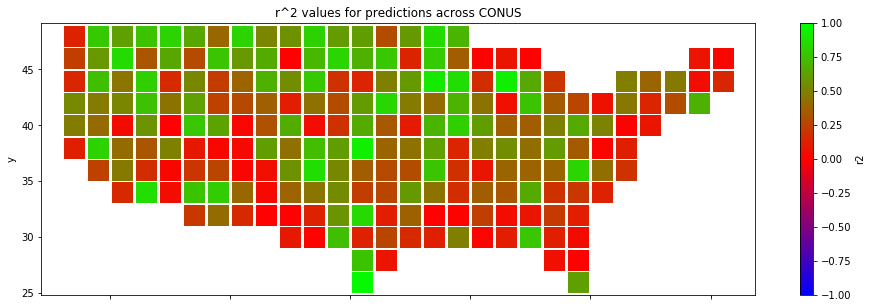

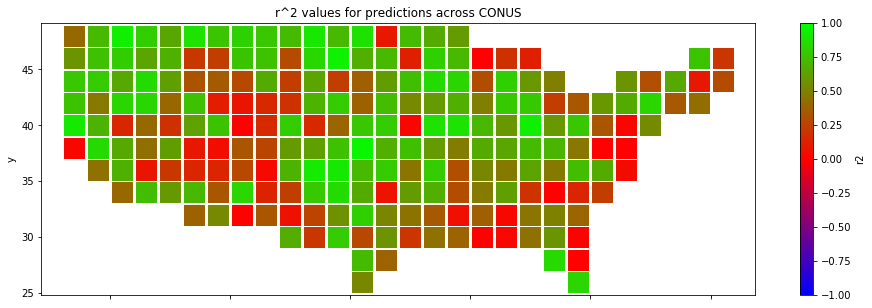

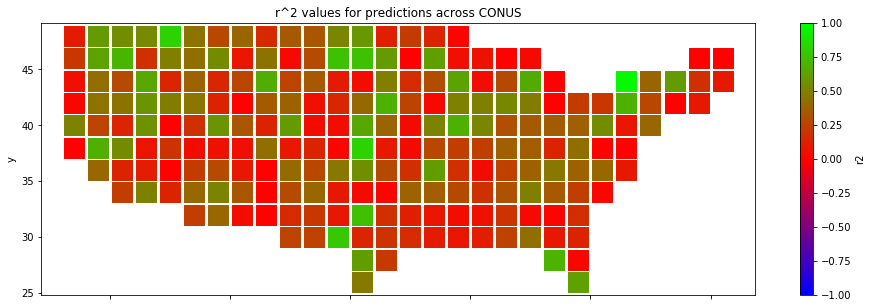

In [30]:
path = "../out_2019_08_19-20/2012/job1.r2"
#June 2012, RF, HYPPO 2D deg<=3 10neighbors, KKNN 10 neighbors
rfr2 = []
hyr2 = []
kkr2 = []
with open(path, "r") as results:
    for line in results:
        line2 = line.split(",")
        if len(line2)>1:
            r2 = float(line2[0])
            parts = line2[1].split("/")
            coords = [int(n) for n in parts[-3].split("_")]
            x = coords[0] + 1
            y = coords[2] + 1
            method = parts[-1][:2]
            if method=="RF":
                rfr2.append((x, y, r2))
            elif method=="HY":
                hyr2.append((x, y, r2))
            elif method=="KK":
                kkr2.append((x, y, r2))
rfr2 = pd.DataFrame(rfr2, columns=['x', 'y', 'r2'])
rfr2.head()
r2map(rfr2)
hyr2 = pd.DataFrame(hyr2, columns=['x', 'y', 'r2'])
hyr2.head()
r2map(hyr2)
kkr2 = pd.DataFrame(kkr2, columns=['x', 'y', 'r2'])
kkr2.head()
r2map(kkr2)

----

This section of the sandbox is for reading in and plotting the statistics calculated box-by-box on the training data.

In [62]:
#2017 stats (can be copied out of one of Danny's virtual volumes on Jetstream)
dir_path = "/vol_b/data/2017/t_2019_09_25-27/"
import csv
import numpy as np
import pandas as pd
from os import path, listdir
from time import time
from matplotlib import pyplot as plt
t0 = time()

# The .stat files are named by the box limits
# Extract the centroid from the file name
files = listdir(dir_path)
files = [file.split(".")[0] for file in files if file[-6:]==".stats"]
def str_to_pair(file_str):
    quad = [int(part) for part in file_str.split("_")]
    pair = (quad[0]+1, quad[2]+1)
    return pair
coords = {str_to_pair(file):file for file in files}
print(list(coords.keys())[:13])
print(coords[(-69, 48)])

# For each box, assign as it's lon/lat coordinate the centroid
# Each row of the box's dataframe will be a unique statistic computed on that box
def df_from_coord(coord):
    file_root = dir_path + coords[coord]
    with open(file_root + ".csv", 'r') as header_file:
        header = header_file.readline().strip().replace('"','').split(",")
    df = pd.read_csv(file_root + ".stats", names = header)
    df["lon"] = coord[0]
    df["lat"] = coord[1]
    stat_names = pd.read_csv(file_root + ".stats.keys", names = ["stat"])
    df["stat"] = stat_names
    #df.set_index(["stat", "lon", "lat"], inplace=True)
    return df

# All the box dataframes are concatenated into a single dataframe, 
# so a single statistic can be compared from accross all the boxes.
stats_df = False
for coord in coords:
    if type(stats_df)==bool:
        stats_df = df_from_coord(coord)
    else:
        stats_df = df.append(df_from_coord(coord))
print(stats_df.shape)
print(stats_df.head(67))

[(-93, 42), (-107, 34), (-89, 38), (-91, 36), (-125, 40), (-121, 36), (-79, 48), (-111, 30), (-69, 48), (-77, 34), (-89, 32), (-91, 26), (-97, 48)]
(23034, 32)
             x          y          X1          X2          X3         X4  \
0   -93.000000  42.000000    0.309977    0.349173    0.343537   0.328948   
1     0.577350   0.577350   0.0381865   0.0257681   0.0262659  0.0246839   
2   -93.875000  41.125000    0.238072    0.277561    0.290495   0.287388   
3   -92.125000  42.875000    0.380625    0.402869    0.386426   0.366523   
4     1.750000   1.750000    0.142552    0.125308   0.0959311  0.0791346   
5   -93.437500  41.562500    0.277718    0.329224    0.320751   0.304473   
6   -92.562500  42.437500    0.336424    0.369571    0.367329   0.351405   
7    64.000000  64.000000          59          64          64         64   
8    64.000000  64.000000          59          64          64         64   
9    64.000000  64.000000          59          64          64         64   
10  

In [84]:
# For investigating first-month predictions based on just (lon/lat/sm):
X1_df = stats_df[["lon", "lat", "stat", "X1"]]
X1_df.shape
def Xm_stat_df(m, stat):
    Xm_df = stats_df[["lon", "lat", "stat", f"X{m}"]]
    #print(m, ":", Xm_df.shape)
    #print(Xm_df.head(1))
    stat_df = Xm_df[Xm_df["stat"]==stat]
    stat_df = stat_df.drop(columns=["stat"])
    print(stat, ":", stat_df.shape)
    print(stat_df.head(1))
    return stat_df
X1_std_df = Xm_stat_df(1, 'std()')


stat_list = list(set(df["stat"]))
stat_list_1 = [stat for stat in stat_list if stat[-2:]=="()"]
print(stat_list_1)

std() : (349, 3)
   lon  lat         X1
1  -93   42  0.0381865
['mean()', 'std()', 'range()', 'min()', 'max()', 'quantile25()', 'quantile75()', 'count()']


In [23]:
# For interest in predictor variability, looking at the standard deviation of each predictor within each box.
std_df = stats_df[stats_df["stat"]=="std()"]
std_df = std_df.drop(columns=["x","y","stat"])
std_df.set_index(["lon", "lat"], inplace=True)
#print(std_df.head())
print(std_df.columns)
std_df = std_df.astype(float)
#print(std_df.dtypes)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'DEM', 'HILL', 'SLP', 'ASP', 'CSC', 'LC', 'CI', 'CD', 'FA',
       'TWI', 'LSF', 'CNB', 'VDC', 'VD', 'RSP'],
      dtype='object')


In [24]:
# Normalize every column of std_df
normed = (std_df - std_df.mean())/std_df.std()
normed.head()
normed.dropna(inplace=True)
normed.count()

X1      197
X2      197
X3      197
X4      197
X5      197
X6      197
X7      197
X8      197
X9      197
X10     197
X11     197
X12     197
DEM     197
HILL    197
SLP     197
ASP     197
CSC     197
LC      197
CI      197
CD      197
FA      197
TWI     197
LSF     197
CNB     197
VDC     197
VD      197
RSP     197
dtype: int64

In [25]:
# See if KMeans can run on the normalized data
from sklearn.cluster import KMeans
km = KMeans(n_clusters=10).fit(normed)
normed["cluster"] = km.labels_
#print(normed.head())
clusters = normed["cluster"].to_frame()
print(clusters.head())
normed.drop(columns="cluster", inplace=True)

          cluster
lon  lat         
-93  42         0
-107 34         3
-89  38         6
-91  36         0
-121 36         2


In [26]:
clusters.iloc(0)

/opt/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


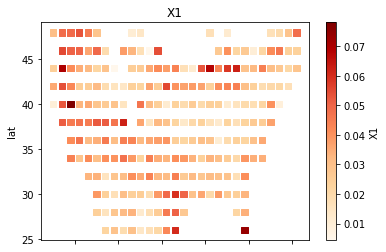

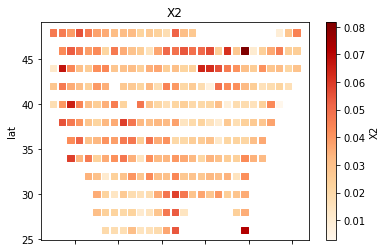

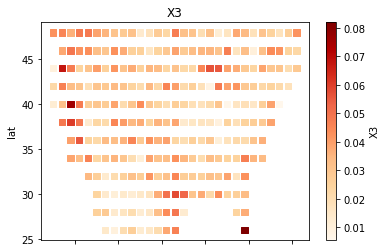

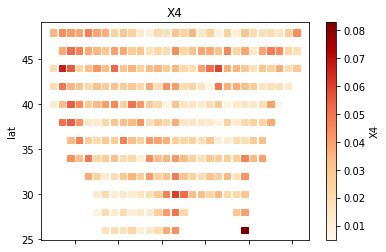

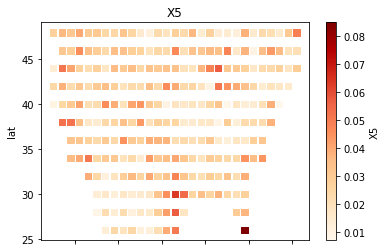

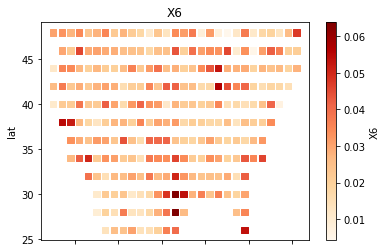

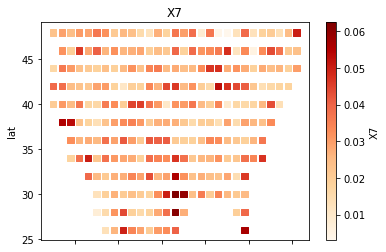

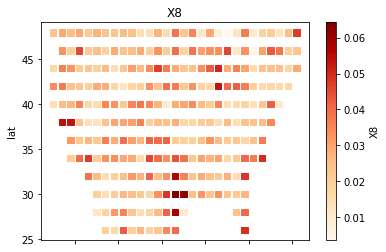

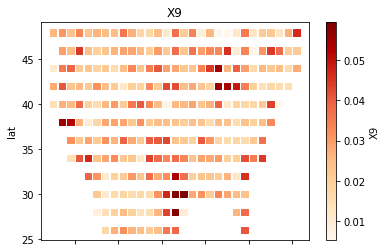

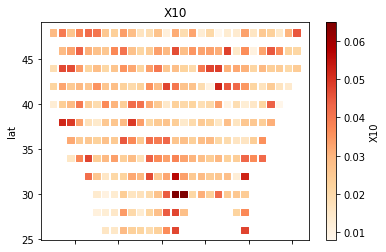

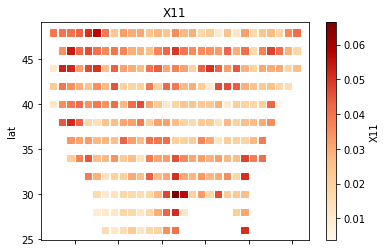

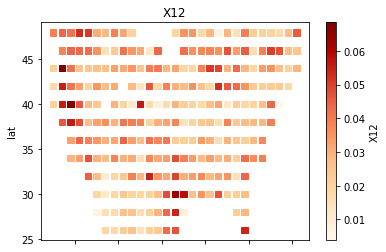

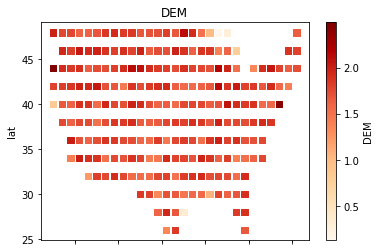

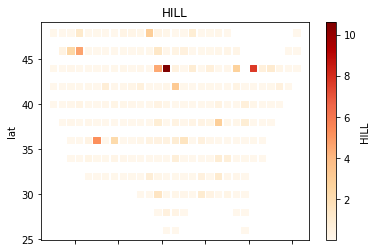

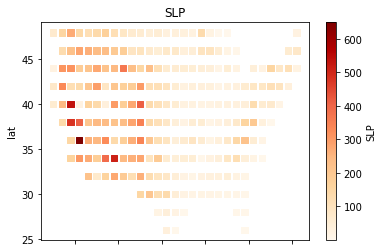

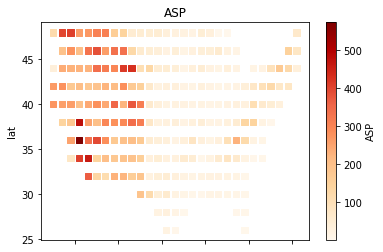

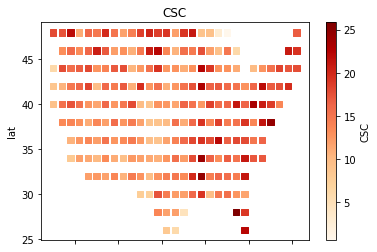

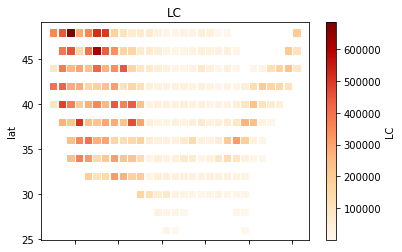

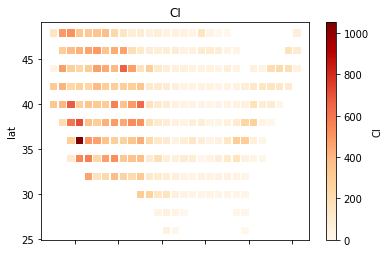

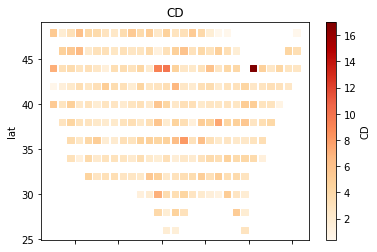

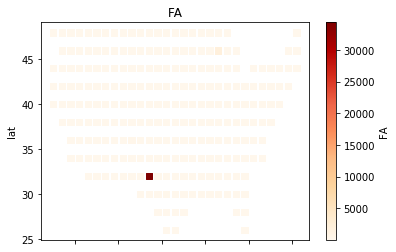

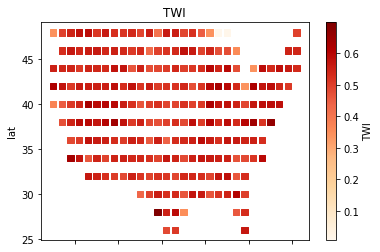

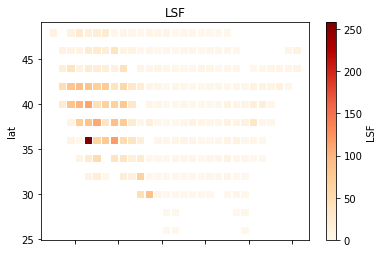

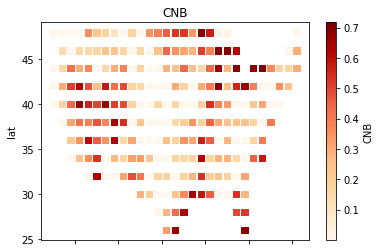

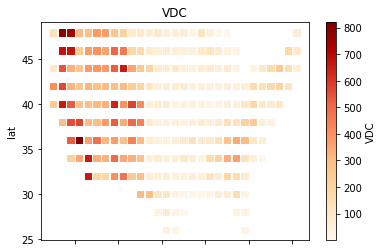

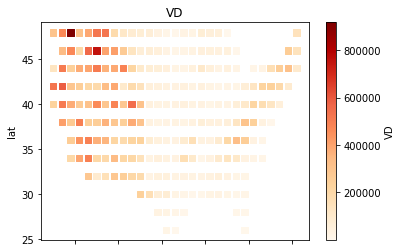

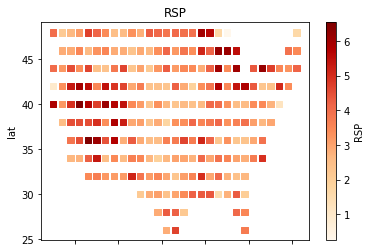

In [29]:
# Trying to remove any box that is more than a few standard deviations above the the mean of the given statistic
# (relative to that statistic accross all boxes of CONUS)
#def replace(group, stds):
#    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
#    return group
#for group_column in std_df.columns:
#    std_df.loc[:, std_df.columns != group_column] = std_df.groupby(group_column).transform(lambda g: replace(g, 3))

#from scipy import stats

def plot_column(df, col, outliers=0):
    stdf = df[col].astype(float).to_frame()
    stdf.reset_index(inplace=True)
    for i in range(outliers):
        stdf.drop(stdf[col].idxmax(), inplace=True)
    stdf.plot.scatter(0,1,c=2, cmap=plt.cm.OrRd, marker="s", s=40, title=col)

def plot_every_column(df, outliers=0):#, clusters=False):
    for st in df.columns:
        plot_column(df, st, outliers)
        
plot_every_column(std_df)

/home/dror/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:338: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


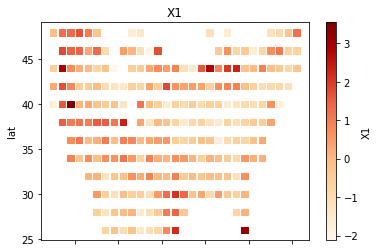

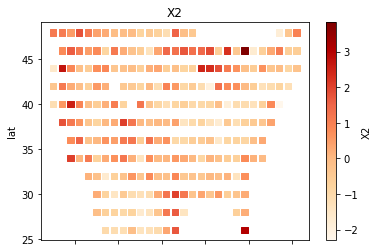

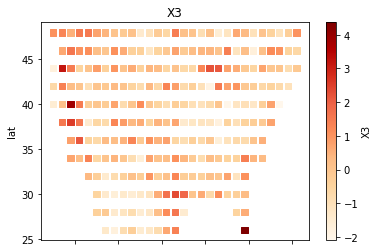

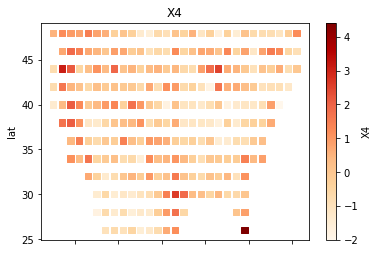

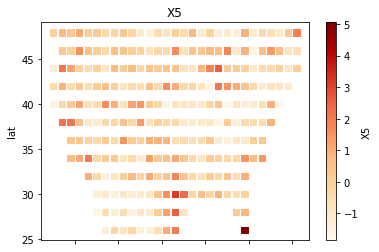

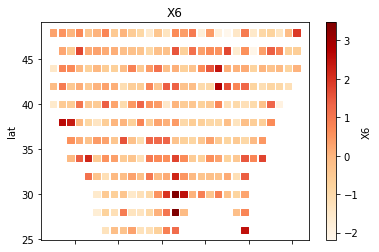

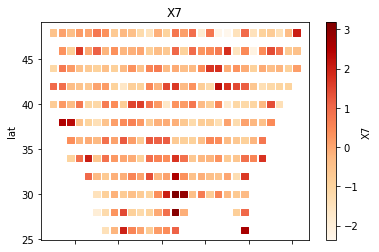

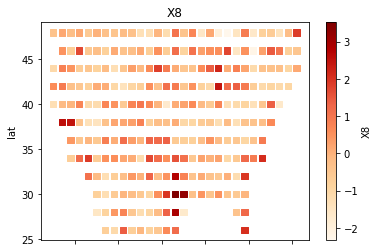

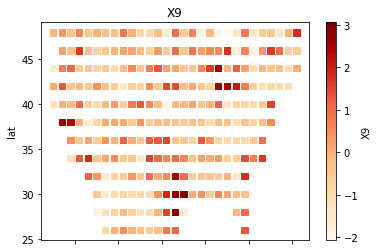

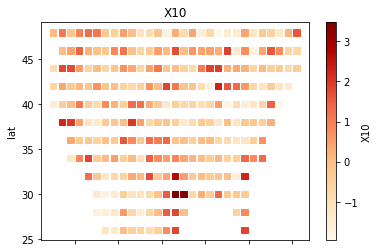

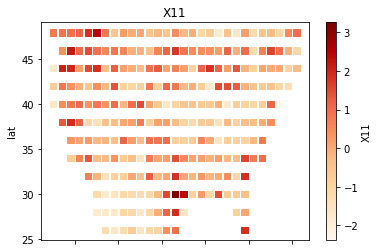

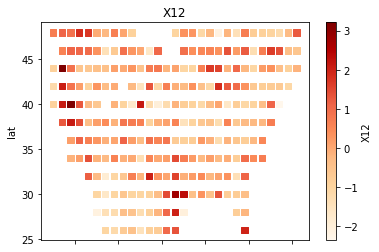

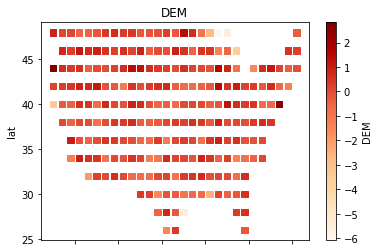

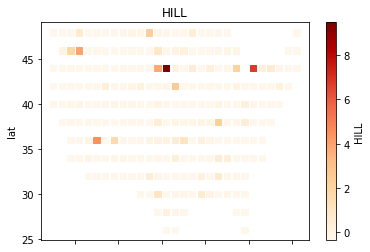

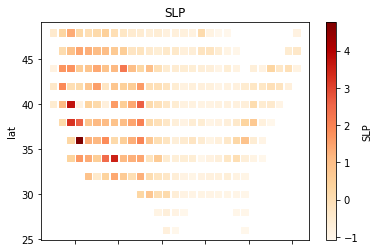

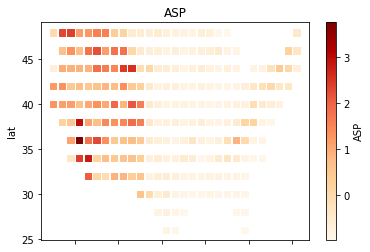

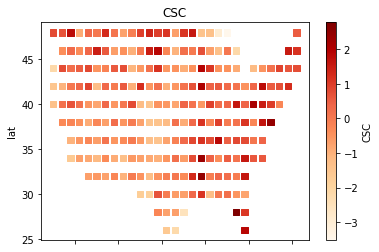

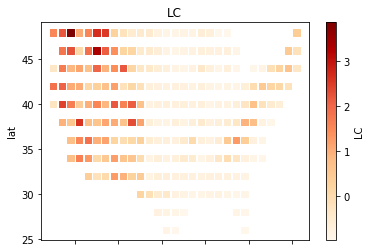

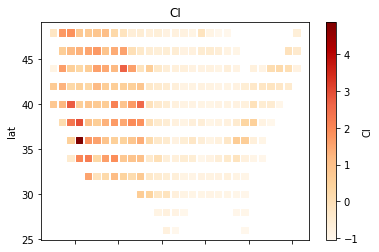

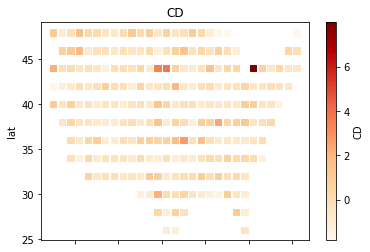

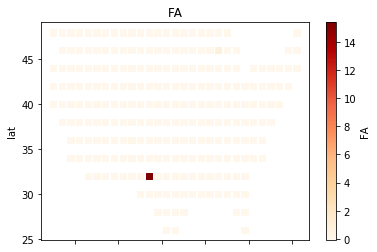

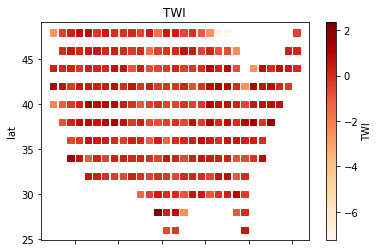

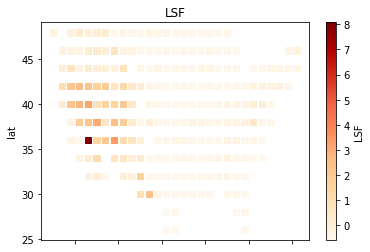

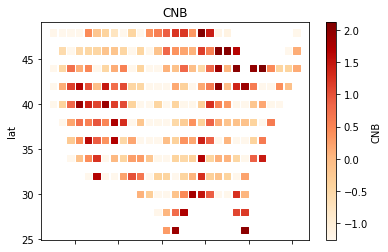

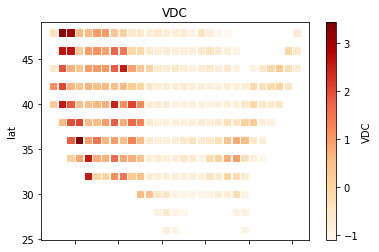

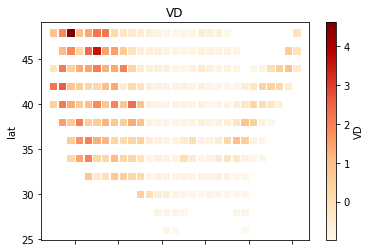

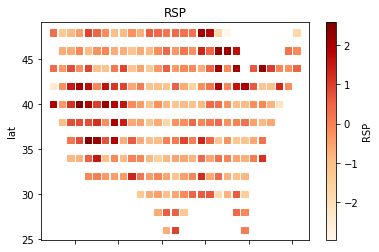

In [23]:
plot_every_column(normed)

In [6]:
import csv
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def heatmap(df, horizontal=0, vertical=1, value=2, vmin=None, vmax=None, size=1, title="Heatmap", out="", cmap=None, marker="o"):
    df.plot.scatter(x=horizontal, y=vertical, s=size, c=value, cmap=cmap, title=title, vmin=vmin, vmax=vmax, marker=marker, figsize=(16, 5))
    if out:
        print(f"Saving image to {out}")
        plt.savefig(fspath(out))
    else:
        plt.show()
    #plt.clf()
def r2map(df):
    heatmap(df, vmin=-1, vmax=1, title="r^2 values for predictions across CONUS", cmap=plt.cm.get_cmap('brg'), marker="s", size=400)

dict_keys(['KKNN-k10-c2', 'HYPPO-p1-k10-D2-s0-v4', 'KKNN-k10-c3', 'KKNN-k10-c4', 'RF-c2', 'KKNN-k15-c4', 'HYPPO-p1-k15-D2-s0-v3', 'RF-c3', 'HYPPO-p1-k10-D2-s0-v3', 'KKNN-k15-c3', 'RF-c4', 'HYPPO-p1-k15-D2-s0-v4', 'KKNN-k15-c2'])
RF-c2
   lon  lat        r2
0 -123   38  0.975564
1 -123   40  0.796400
2 -123   42  0.251790
3 -123   44  0.606027
4 -123   46  0.466901


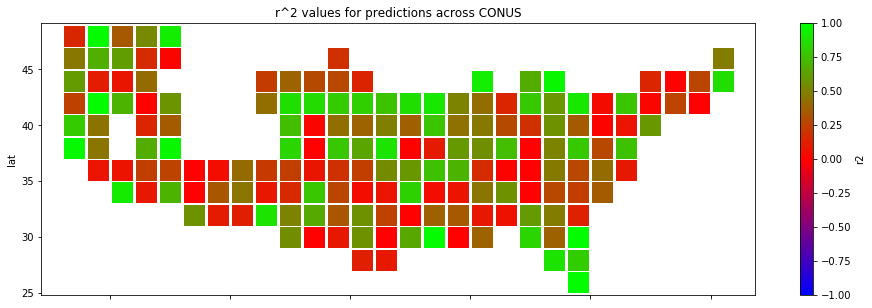

KKNN-k15-c4
   lon  lat        r2
0 -123   38  0.898992
1 -123   40  0.591350
2 -123   42  0.140692
3 -123   44  0.148065
4 -123   46  0.119487


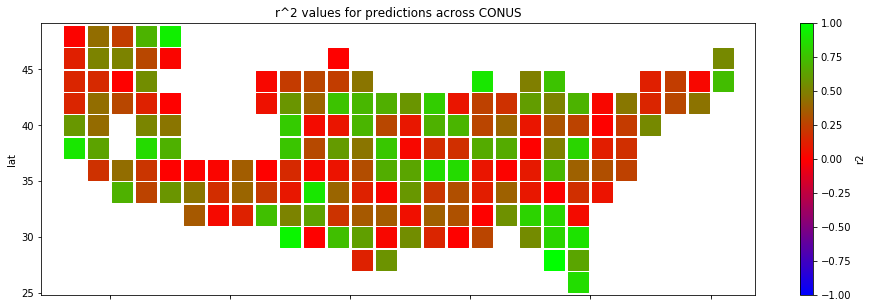

HYPPO-p1-k15-D2-s0-v3
   lon  lat        r2
0 -123   38  0.229399
1 -123   40  0.468391
2 -123   42  0.162334
3 -123   44  0.259419
4 -123   46  0.087508


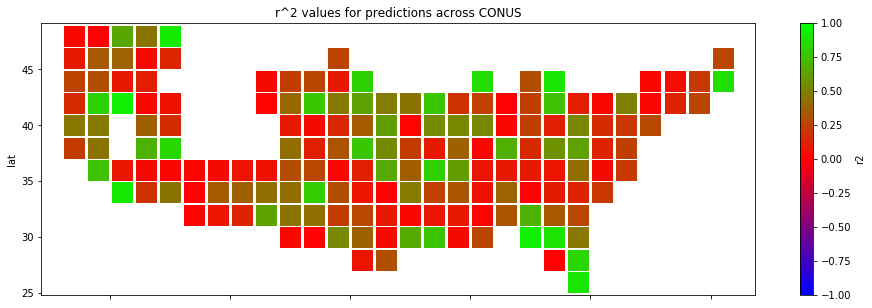

RF-c3
   lon  lat        r2
0 -123   38  0.994162
1 -123   40  0.640681
2 -123   42  0.412702
3 -123   44  0.676226
4 -123   46  0.348160


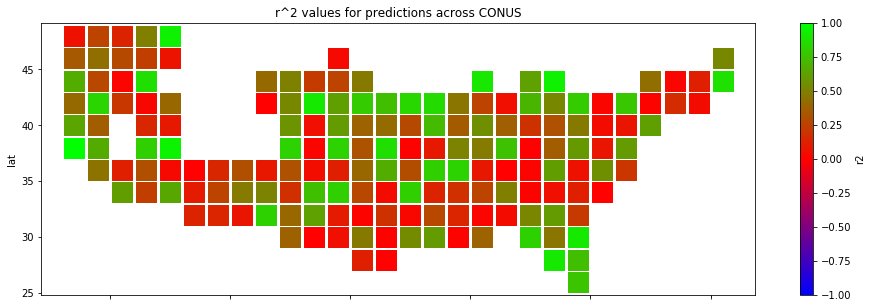

KKNN-k15-c3
   lon  lat        r2
0 -123   38  0.798542
1 -123   40  0.652004
2 -123   42  0.123675
3 -123   44  0.175800
4 -123   46  0.020920


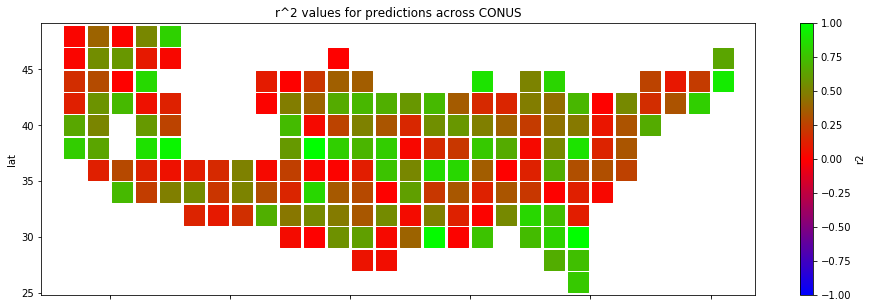

RF-c4
   lon  lat        r2
0 -123   38  0.982846
1 -123   40  0.639670
2 -123   42  0.464828
3 -123   44  0.357699
4 -123   46  0.215279


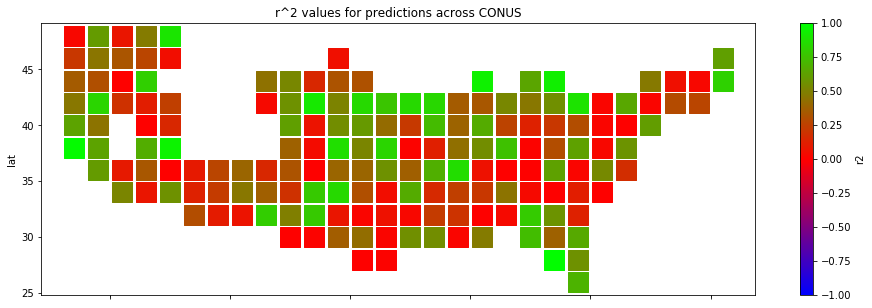

HYPPO-p1-k15-D2-s0-v4
   lon  lat        r2
0 -123   38  0.205785
1 -123   40  0.447926
2 -123   42  0.597957
3 -123   44  0.405154
4 -123   46  0.255934


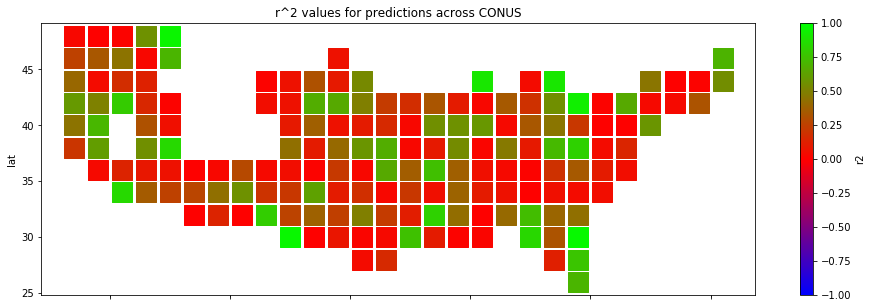

KKNN-k15-c2
   lon  lat        r2
0 -123   38  0.941742
1 -123   40  0.757589
2 -123   42  0.203922
3 -123   44  0.592924
4 -123   46  0.028135


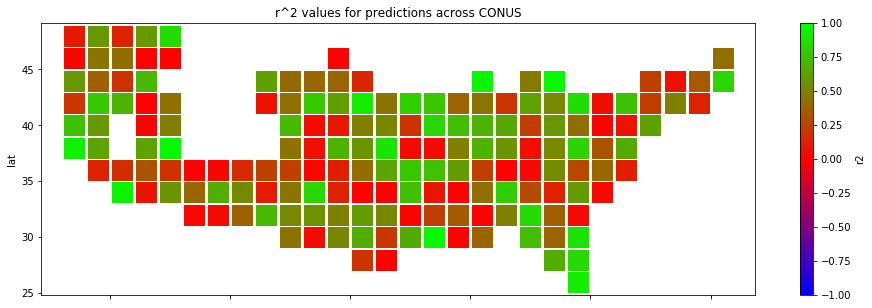

In [33]:
path = "/vol_b/out/2017/job3.r2"
#June 2012, RF, HYPPO 2D deg<=3 10neighbors, KKNN 10 neighbors

job3 = {}

with open(path, "r") as results:
    for line in results:
        line2 = line.split(",")
        if len(line2)>1:
            r2 = float(line2[0])
            parts = line2[1].split("/")
            coords = [int(n) for n in parts[-3].split("_")]
            x = coords[0] + 1
            y = coords[2] + 1
            method = parts[-1].split(".")[0]
            if method in job3.keys():
                job3[method].append((x, y, r2))
            else:
                job3[method] = [(x, y, r2)]

print(job3.keys())
r2df = {}
for method in job3:
    if "k10" not in method:
        r2df[method] = pd.DataFrame(job3[method], columns=['lon', 'lat', 'r2'])
        #r2df.set_index(["lon", "lat"], inplace=True)
        #r2df.reset_index(inplace=True)
        print(method)
        print(r2df[method].head())
        r2map(r2df[method])
        #r2df.plot.scatter(0,1,c=2, cmap=plt.cm.OrRd, marker="s", s=40, title=method)

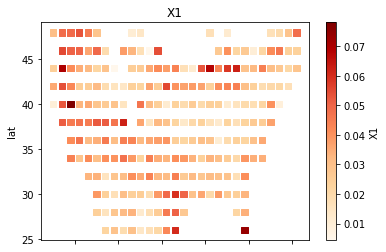

In [32]:
plot_column(std_df, "X1")

In [78]:
a = r2df["KKNN-k15-c2"]#.set_index(["lon", "lat"])
b = std_df["X1"].to_frame()
b.reset_index(inplace=True)
print(a.head())
print(b.head())

   lon  lat        r2
0 -123   38  0.941742
1 -123   40  0.757589
2 -123   42  0.203922
3 -123   44  0.592924
4 -123   46  0.028135
    lon lat          X1
0   -93  42   0.0381865
1  -107  34   0.0389948
2   -89  38   0.0165073
3   -91  36   0.0307166
4  -125  40  0.00976513


In [79]:
c = a.merge(b)
print(c.shape)

(169, 4)


In [80]:
print(c.head())

    lon lat        r2         X1
0  -123  38  0.941742  0.0517631
1  -123  40  0.757589  0.0529629
2  -123  42  0.203922  0.0541755
3  -123  44  0.592924  0.0696999
4  -123  46  0.028135  0.0552775


In [81]:
c["X1"].astype('float64').corr(c["r2"].astype('float64'))

0.15827644637256477

In [85]:
#for stat_col in std_df.columns:
#    if (stat_col=="X1") or (stat_col[0]!="X"):
#        b = std_df[stat_col].to_frame()
#        b.reset_index(inplace=True)
#        print(stat_col)
#        c = a.merge(b)
#        print(c[stat_col].astype('float64').corr(c["r2"].astype('float64')))
        
for stat in stat_list_1:
    b = Xm_stat_df(1, stat)
    print(stat)
    c = a.merge(b)
    print(c["X1"].astype('float64').corr(c["r2"].astype('float64')))
    

mean() : (349, 3)
   lon  lat        X1
0  -93   42  0.309977
mean()
0.008784624209650415
std() : (349, 3)
   lon  lat         X1
1  -93   42  0.0381865
std()
0.15762160215909377
range() : (349, 3)
   lon  lat        X1
4  -93   42  0.142552
range()
0.08179440139613335
min() : (349, 3)
   lon  lat        X1
2  -93   42  0.238072
min()
-0.03126464948743354
max() : (349, 3)
   lon  lat        X1
3  -93   42  0.380625
max()
0.04078444221013571
quantile25() : (349, 3)
   lon  lat        X1
5  -93   42  0.277718
quantile25()
-0.03957237425347733
quantile75() : (349, 3)
   lon  lat        X1
6  -93   42  0.336424
quantile75()
0.0479055673444794
count() : (349, 3)
   lon  lat  X1
7  -93   42  59
count()
-0.14552153094010498


---

In [64]:
import csv
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
cmap_brg = cm.get_cmap('brg', 256)
col_rg = cmap_brg(np.linspace(0.5, 1, 128))
cmap_rg = ListedColormap(col_rg)

def heatmap(df, horizontal=0, vertical=1, value=2, vmin=None, vmax=None, size=1, title="Heatmap", out="", cmap=None, marker="o"):
    df.plot.scatter(x=horizontal, y=vertical, s=size, c=value, cmap=cmap, title=title, vmin=vmin, vmax=vmax, marker=marker, figsize=(16, 5))
    if out:
        print(f"Saving image to {out}")
        plt.savefig(fspath(out))
    else:
        plt.show()
    plt.close()
def accuracy_map(df, method, measure="r2"):
    heatmap(df, title=f"{measure} values for {method} predictions across CONUS", cmap=cmap_rg, marker="s", size=400)#, vmin=0, vmax=1)

In [65]:
def read_accuracies(path):
    job = {}
    with open(path, "r") as results:
        for line in results:
            line2 = line.split(",")
            if len(line2)>1:
                r = float(line2[0])**2
                parts = line2[1].split("/")
                coords = [int(n) for n in parts[-3].split("_")]
                x = coords[0] + 1
                y = coords[2] + 1
                method = parts[-1].split(".")[0]
                if method in job.keys():
                    job[method].append((x, y, r))
                else:
                    job[method] = [(x, y, r)]
    return job

def plot_accuracies(path):
    job3 = read_accuracies(path)
    #print(job3.keys())
    rdf = {}
    for method in job3:
        rdf[method] = pd.DataFrame(job3[method], columns=['lon', 'lat', 'r2'])
        #rdf.set_index(["lon", "lat"], inplace=True)
        #rdf.reset_index(inplace=True)
        print(method)
        print(rdf[method].head())
        accuracy_map(rdf[method], method, path.split(".")[-1])

HYPPO-v4-L1-p1-D3
   lon  lat        r2
0 -125   49  0.112047
1 -123   39  0.748675
2 -123   41  0.505321
3 -123   43  0.325823
4 -123   45  0.594986


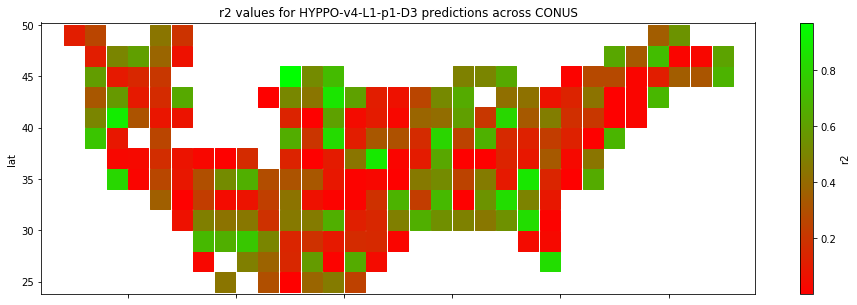

In [66]:
path = "/home/dror/Src_SOMOSPIE/out/job_2020_01_28_19_35_11/jobR2.r2"
#January 2017, pca(lon/lat + 14 topo covariates)
#HYPPO: v.7, 4 predictors (lon/lat + 2 PCs), deg<=3, 10 neighbors

plot_accuracies(path)

HYPPO-v4-L1-p1-D3
   lon  lat        r2
0 -125   49  0.036610
1 -123   39  0.019893
2 -123   41  0.042667
3 -123   43  0.039483
4 -123   45  0.040971


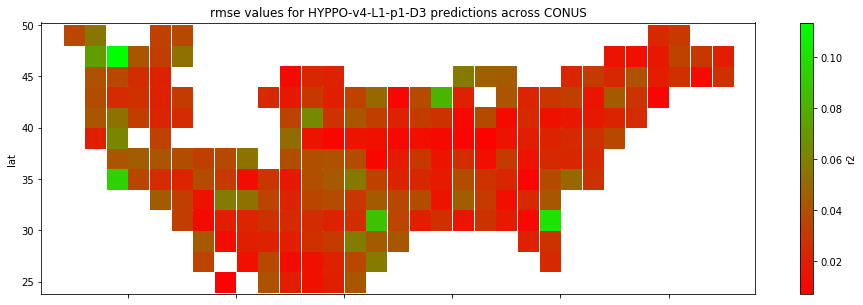

In [58]:
path = "/home/dror/Src_SOMOSPIE/out/job_2020_01_28_19_35_11/jobRMSE.rmse"
plot_accuracies(path)

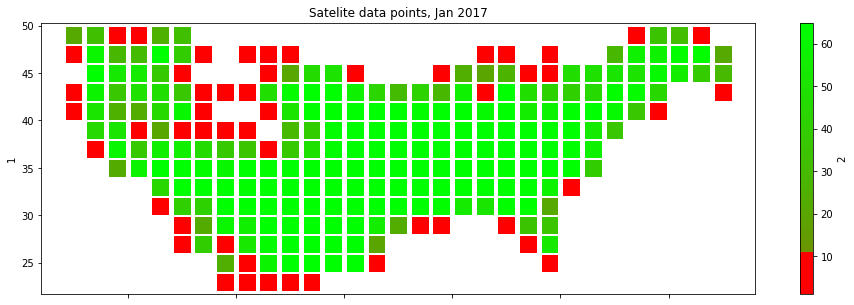

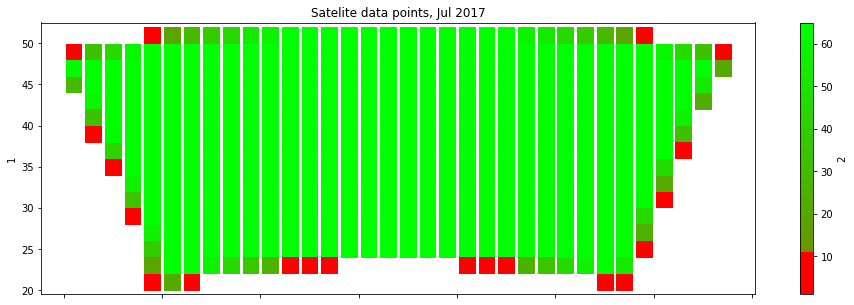

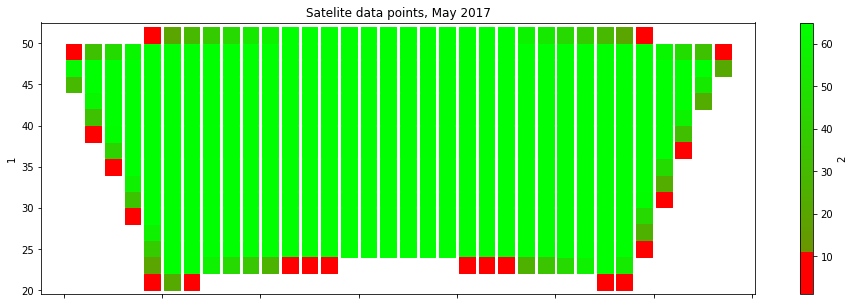

In [68]:
def count_points(paths, month=""):
    import os
    import pandas as pd
    import numpy as np
    from matplotlib import cm
    from matplotlib.colors import ListedColormap, LinearSegmentedColormap
    
    job = {}
    for path in paths:
        for file in os.listdir(path):
            #print(file)
            parts = file.split(".")[0]
            #print(parts)
            coords = [int(n) for n in parts.split("_")]
            x = coords[0] + 1
            y = coords[2] + 1
            #print(x,y)
            count = len(open(f"{path}/{file}").readlines())
            #print(count)
            if (x,y) in job.keys():
                job[(x,y)] += count
            else:
                job[(x,y)] = count
    #print(job)
    
    counts = [[x,y,job[(x,y)]] for x,y in job]
    #print(counts)
    
    df = pd.DataFrame(counts)
    
    #https://matplotlib.org/3.1.0/tutorials/colors/colormap-manipulation.html
    cmap_brg = cm.get_cmap('brg', 256)
    col_rg = cmap_brg(np.linspace(0.75, 1, 64))
    col_rg[:10, :] = np.array([1, 0, 0, 1])
    cmap_rg = ListedColormap(col_rg)
    
    heatmap(df, size=250, marker='s', cmap=cmap_rg, title=f"Satelite data points, {month} 2017")
    
    #return job

count_points(["../data/2017/t-postproc-month1-PCA-0.25_28498",
              "../data/2017/original_sm-month1-PCA-0.25_28498"], month="Jan")#/-100_-98_30_32.csv")

count_points(["../data/2017/t-postproc-month7-PCA-0.25_28498",
              "../data/2017/original_sm-month7-PCA-0.25_28498"], month="Jul")#/-100_-98_30_32.csv")

count_points(["../data/2017/t-postproc-month5-PCA-0.25_28498",
              "../data/2017/original_sm-month5-PCA-0.25_28498"], month="May")#/-100_-98_30_32.csv")